# Homework 2

It can be problematic to use standard kernel density estimation to approximate a density with bounded support. Demonstrate this as follows:

- Simulate lognormal data.
- Fit Gaussian kernel density estimates using `scipy.stats.gaussian_kde`.
- Display three plots showing the tradeoff between fit at the support boundary and overall fit.

Explain why the phenomenon demonstrated in the plots occurs.

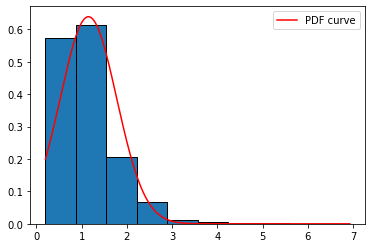

In [1]:
#importing Libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian

#Generate Data
Data= stats.lognorm(s=0.5).rvs(size=2000)

#Sort the Data
Data_sorted=np.sort(Data)

#Calculating the Mean and Standard Deviation
mean = np.mean(Data)
std = np.std(Data)

#plot the histogram of the data
plt.hist(Data,density = True, edgecolor = 'Black')
pdf=gaussian.pdf(Data_sorted,mean,std)

#plot Probability Density function
plt.plot(Data_sorted,pdf,color='red',label='PDF curve')
plt.legend()

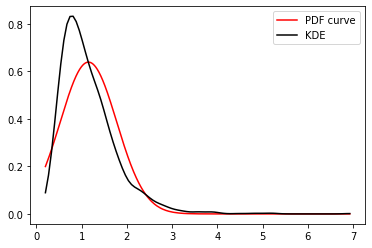

In [2]:
#Fit Gaussian kernel density estimates to the data

kernel = stats.gaussian_kde(Data)
x = np.linspace(np.min(Data),np.max(Data),num=100)
y = kernel.evaluate(x)
plt.plot(Data_sorted,pdf,color='red',label='PDF curve')
plt.plot(x,y,'k',label='KDE')
plt.legend()

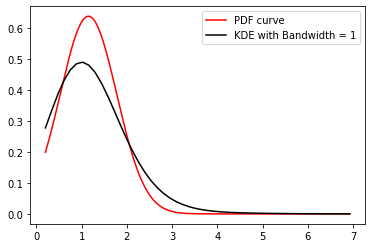

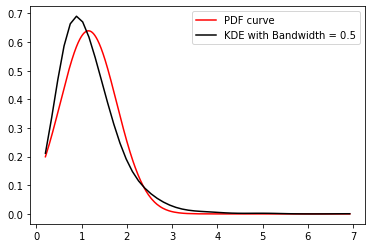

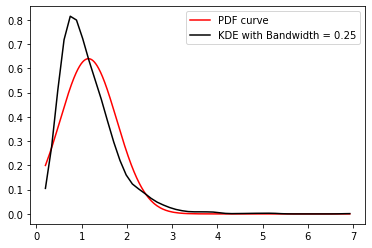

In [3]:
# Display three plots with different Bandwidth
kernel1 = stats.gaussian_kde(Data,bw_method=1)
kernel2 = stats.gaussian_kde(Data,bw_method=0.5)
kernel3 = stats.gaussian_kde(Data,bw_method=0.25)
x = np.linspace(np.min(Data),np.max(Data),num=50)
y1 = kernel1.evaluate(x)
y2 = kernel2.evaluate(x)
y3 = kernel3.evaluate(x)

#plot KDE with Bin Width =1
plt.plot(Data_sorted,pdf,color='red',label='PDF curve')
plt.plot(x,y1,'k', label='KDE with Bandwidth = 1')
plt.legend()
plt.show()

#plot KDE with Bin Width =0.5
plt.plot(Data_sorted,pdf,color='red',label='PDF curve')
#plt.hist(Data,density = True, edgecolor = 'Black')
plt.plot(x,y2,'k',label='KDE with Bandwidth = 0.5')
plt.legend()
plt.show()

#plot KDE with Bin Width =0.25
plt.plot(Data_sorted,pdf,color='red',label='PDF curve')
#plt.hist(Data,density = True, edgecolor = 'Black')
plt.plot(x,y3,'k',label='KDE with Bandwidth = 0.25')
plt.legend()
plt.show()

### Explanation:

Giving the bandwidth can be used to control the kernel function. The kernel function would be much dispersed if the bandwidth was high. When we look at the three plots above, we can observe that the kernel functions become smaller and narrower as the bandwidth drops. While estimates from lesser bandwidths are quite rough, estimates from larger bandwidths are much smoother. Therefore, selecting the right bandwidth is essential while estimating the kernel density. Similarly , while comparing the KDE with PDF we can notice that if the bandwidth is too large then the plot widens w.r.t true PDF and when it is too small the plot gets narrower w.r.t true PDF. Therefore ,appropriate choice of bandwidth is crucial while plotting a KDE. 